<a href="https://colab.research.google.com/github/Avanika07/Bitcoin-Price-Prediction/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
# Load our dataset
maindf=pd.read_csv('bitcoin.csv')

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2713
Total number of fields present in the dataset:  7


In [ ]:
maindf.shape

(2713, 7)

In [ ]:

maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,15-02-2022,42586.46484,44667.21875,42491.03516,44575.20313,44575.20313,2.272166e+10
2709,16-02-2022,44578.27734,44578.27734,43456.69141,43961.85938,43961.85938,1.979255e+10
2710,17-02-2022,43937.07031,44132.97266,40249.37109,40538.01172,40538.01172,2.624666e+10
2711,18-02-2022,40552.13281,40929.15234,39637.61719,40030.97656,40030.97656,2.331001e+10
2712,19-02-2022,40022.13281,40246.02734,40010.86719,40126.42969,40126.42969,2.226390e+10


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   float64
dtypes: float64(6), object(1)
memory usage: 148.5+ KB


In [ ]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555058,11323.914637,11323.914637,1.470462e+10
std,16106.428892,16537.390649,15608.572561,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399410,10762.644530,10202.387700,10462.259770,10462.259770,2.456992e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 17-09-2014
Ending Date 19-02-2022


In [ ]:
# Convert the 'Date' column to datetime with correct format
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%d-%m-%Y')

# Filter the DataFrame for the specified date range
start_date = '2014-09-17'
end_date = '2022-02-19'
y_overall = maindf.loc[(maindf['Date'] >= start_date) & (maindf['Date'] <= end_date)]

# Drop 'Adj Close' and 'Volume' columns
y_overall = y_overall.drop(columns=['Adj Close', 'Volume'])

# Change the format of 'Date' column to 'YYYY-MM-DD'
y_overall['Date'] = y_overall['Date'].dt.strftime('%Y-%m-%d')

print(y_overall)

            Date          Open          High           Low         Close
0     2014-09-17    465.864014    468.174011    452.421997    457.334015
1     2014-09-18    456.859985    456.859985    413.104004    424.440002
2     2014-09-19    424.102997    427.834991    384.532013    394.795990
3     2014-09-20    394.673004    423.295990    389.882996    408.903992
4     2014-09-21    408.084991    412.425995    393.181000    398.821014
...          ...           ...           ...           ...           ...
2708  2022-02-15  42586.464840  44667.218750  42491.035160  44575.203130
2709  2022-02-16  44578.277340  44578.277340  43456.691410  43961.859380
2710  2022-02-17  43937.070310  44132.972660  40249.371090  40538.011720
2711  2022-02-18  40552.132810  40929.152340  39637.617190  40030.976560
2712  2022-02-19  40022.132810  40246.027340  40010.867190  40126.429690

[2713 rows x 5 columns]


In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2022-02-19')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
2708,2022-02-15,42586.464840,44667.218750,42491.035160,44575.203130
2709,2022-02-16,44578.277340,44578.277340,43456.691410,43961.859380
2710,2022-02-17,43937.070310,44132.972660,40249.371090,40538.011720
2711,2022-02-18,40552.132810,40929.152340,39637.617190,40030.976560


In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,12855.131425,12828.374882
February,12773.077824,12837.802432
March,10918.895762,10957.226324
April,11338.448900,11359.962198
May,10659.455257,10580.209318
June,9299.305978,9294.420703
July,9285.402500,9330.128271
August,11312.971707,11345.157739
September,10489.365578,10462.378150


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Lets First Take all the Close Price
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2713, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Now we will Take data of just 1 Year

In [ ]:
closedf = closedf[closedf['Date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


In [ ]:
closedf

,Date,Close
2348,2021-02-20,56099.51953
2349,2021-02-21,57539.94531
2350,2021-02-22,54207.32031
2351,2021-02-23,48824.42578
2352,2021-02-24,49705.33203
...,...,...
2708,2022-02-15,44575.20313
2709,2022-02-16,43961.85938
2710,2022-02-17,40538.01172
2711,2022-02-18,40030.97656


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(365, 1)


In [ ]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (219, 1)
test_data:  (146, 1)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (198, 20)
y_train:  (198,)
X_test:  (125, 20)
y_test (125,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (198, 20, 1)
X_test:  (125, 20, 1)


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 63ms/step - loss: 0.1018 - val_loss: 0.1199
Epoch 2/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0705 - val_loss: 0.0776
Epoch 3/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0442 - val_loss: 0.0418
Epoch 4/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0244 - val_loss: 0.0166
Epoch 5/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0119 - val_loss: 0.0063
Epoch 6/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 7/200
7/7 [==============================] - 0s 43ms/step - loss: 0.0113 - val_loss: 0.0088
Epoch 8/200
7/7 [==============================] - 0s 48ms/step - loss: 0.0100 - val_loss: 0.0062
Epoch 9/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0093 - val_loss: 0.0063
Epoch 10/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0094 - val_loss: 0.0062
Epoch 11/200
7/7 [=

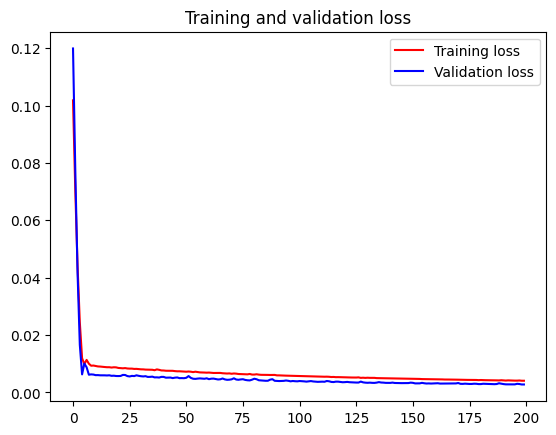

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

4/4 [==============================] - 0s 5ms/step


((198, 1), (125, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2407.427420901721
Train data MSE:  5795706.78690951
Train data MAE:  1950.6761560164139
-------------------------------------------------------------------------------------
Test data RMSE:  1991.0464079284798
Test data MSE:  3964265.798524902
Test data MAE:  1523.75540601


In [ ]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9334778795865555
Test data explained variance regression score: 0.9517976190509488


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.933477473920566
Test data R2 score: 0.9516780919618779


Column 'close' not found in DataFrame. Please check the column name.


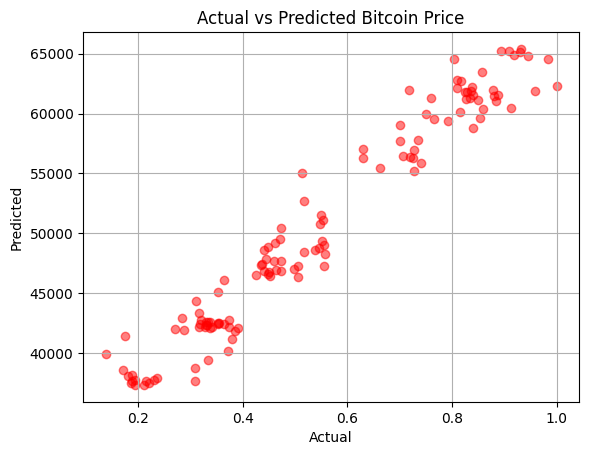

In [ ]:
y_pred=test_predict
plt.scatter(y_test,y_pred,color='red',alpha=0.5)
# Check if 'close' column exists, if not, replace with the correct column name
if 'close' in maindf.columns:
    plt.plot(maindf['close'])
else:
    print("Column 'close' not found in DataFrame. Please check the column name.")
    # Replace 'correct_column_name' with the actual column name containing closing prices
    # plt.plot(maindf['correct_column_name'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Bitcoin Price')
plt.grid(True)
plt.show()